# Assignment 5
## Instructions:
Put all files, source codes and your results in jupyter notebook file and name it as LASTNAME_AssignmentX .ipynb  and submit it through eLearn. Any kind of plagiarism (help from your friends or getting help from internet) is prohibited. Any kind of plagiarism (help from your friends or getting help from internet) is prohibited. 


Use the given Iris flower data set (iris.csv) and code (SampleCodes_003_SimplePCA.ipynb). You are not allowed to use any other code than the given one. If you use any other code, no matter you wrote it or not, you will lose 30 points. You must modify the given code for the items below;

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn import preprocessing

Read the data from the file and store it in a panda dataframe<br>
Your Answer:

In [5]:
df = pd.read_csv(r'iris.csv')
df.set_index('species',inplace=True)
print(df.shape)
df.head()

(150, 4)


,sepal_length,sepal_width,petal_length,petal_width
species,,,,
setosa,5.1,3.5,1.4,0.2
setosa,4.9,3.0,1.4,0.2
setosa,4.7,3.2,1.3,0.2
setosa,4.6,3.1,1.5,0.2
setosa,5.0,3.6,1.4,0.2


Apply the PCA on the data to figure out the most important 3 principal components and show these principal components (numerical values and a bar graph showing the %) <br>
Your Answer:

3 Most Important Principal Components:
PC1: 72.8% - components: [ 0.52237162 -0.26335492  0.58125401  0.56561105]
PC2: 23.0% - components: [0.37231836 0.92555649 0.02109478 0.06541577]
PC3: 3.7% - components: [-0.72101681  0.24203288  0.14089226  0.6338014 ]


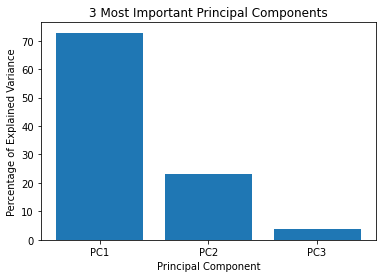

PCA components
     sepal_length  sepal_width  petal_length  petal_width
PC1      0.522372    -0.263355      0.581254     0.565611
PC2      0.372318     0.925556      0.021095     0.065416
PC3     -0.721017     0.242033      0.140892     0.633801
PC4     -0.261996     0.124135      0.801154    -0.523546


In [7]:
scaled_data = preprocessing.scale(df)

pca = PCA()
pca.fit(scaled_data)
pca_data = pca.transform(scaled_data)

# Plots
per_var = np.round(pca.explained_variance_ratio_ * 100, decimals=1)
labels = ['PC' + str(x) for x in range(1, len(per_var) + 1)]

print("3 Most Important Principal Components:")
for i in range(len(per_var)-1):
    print("PC"+str(i+1)+":", str(per_var[i])+"%","- components:", pca.components_[i])

plt.bar(x=range(1, len(per_var)), height=per_var[:3], tick_label=labels[:3])
plt.ylabel('Percentage of Explained Variance')
plt.xlabel('Principal Component')
plt.title('3 Most Important Principal Components')
plt.show()

print("PCA components")
print(pd.DataFrame(pca.components_, index = labels, columns=df.columns))

Transform your data using the first two principal axes and plot the data that shows the data and the classes of flowers, such as 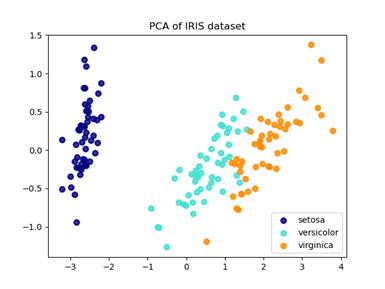

Your Answer:

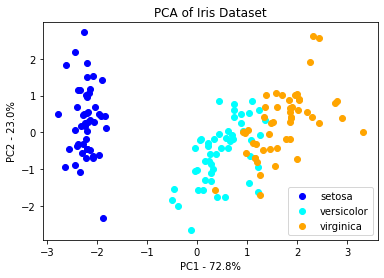

In [4]:
# PC1 and PC2 Plots
pca_df = pd.DataFrame(pca_data, index=df.index, columns=labels)

plt.scatter(pca_df.PC1[pca_df.index=='setosa'], pca_df.PC2[pca_df.index=='setosa'],label='setosa',c="blue")
plt.scatter(pca_df.PC1[pca_df.index=='versicolor'], pca_df.PC2[pca_df.index=='versicolor'],label='versicolor',c="cyan")
plt.scatter(pca_df.PC1[pca_df.index=='virginica'], pca_df.PC2[pca_df.index=='virginica'],label='virginica',c="orange")
plt.title('PCA of Iris Dataset')
plt.xlabel('PC1 - {0}%'.format(per_var[0]))
plt.ylabel('PC2 - {0}%'.format(per_var[1]))
plt.legend()

plt.show()